In [2]:
import EMRyeast36
import pandas as pd
import pickle


In [6]:
targetFolder = r"C:\Users\elgui\Documents\Emr Lab Post Doc\microscopy\2018-06-12_Art1Quant_exp1"
folderData = EMRyeast36.batchParse(targetFolder)
nFields = folderData['nFields']
imageNameList = folderData['imagenameList']
pathList = folderData['pathlist']

In [3]:
qcStack = tifffile.imread(qcPath)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ELG data archive\\Total Microscopy [last update 2018-01-08]\\2017-01-05_LysineSeries_midlog\\EMRyeast(2017-01-09)\\EMRyeast(2017-01-09)_QCstack.tiff'

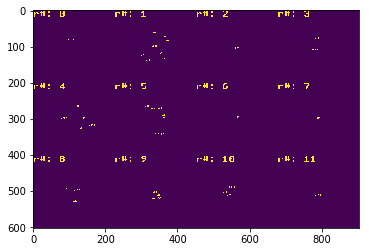

In [5]:
test = qcStack[0:3,:,:]
plt.imshow(test[1])
plt.show()

In [43]:
test_cell_list = [
    'cell_no:1\ngood_cell',
    'cell_no:2\ngood_cell',
    'cell_no:3\nbad_cell',
    'cell_no:4\ngood_cell',
    'cell_no:5\ngood_cell',
    'cell_no:6\ngood_cell'
]
test_status_list = [
    'unreviewed',
    'unreviewed',
    'unreviewed',
    'unreviewed',
    'unreviewed',
    'unreviewed',
]
cell_list=test_cell_list
status_list=test_status_list

In [51]:
location = 0
total = len(cell_list)


b1 = widgets.Button(
        description=' accept',
        icon='check-square',
        tooltip='accept cell and continute')
b2 = widgets.Button(
        description=' reject',
        icon='minus-square',
        tooltip='reject cell and continue')
b3 = widgets.Button(
        description=' previous',
        icon='chevron-left',
        tooltip='go back to previously reviewed cell')
b4 = widgets.Button(
        description=' start',
        icon='step-backward',
        tooltip='start analysis')
out = widgets.Output(
        layout={'border': '1px solid black'})

def clicked_b1(b):
    global location
    global total
    status_list[location] = 'accepted'
    if location == total-1:
        with out:
            out.clear_output()
        with out:
            print('finshed')
    else:
        location += 1
        with out:
            out.clear_output()
        with out:
            print(cell_list[location])
            print(status_list[location])

    
def clicked_b2(b):
    global location
    global total
    status_list[location] = 'rejected'
    if location == total-1:
        with out:
            out.clear_output()
        with out:
            print('finshed')
    else:
        location += 1
        with out:
            out.clear_output()
        with out:
            print(cell_list[location])
            print(status_list[location])


def clicked_b3(b):
    global location
    location -= 1
    with out:
        out.clear_output()
    with out:
        print(cell_list[location])
        print(status_list[location])

        
def clicked_b4(b):
    global location
    location = 0
    with out:
        out.clear_output()
    with out:
        print(cell_list[location])
        print(status_list[location])


    
b1.on_click(clicked_b1)
b2.on_click(clicked_b2)
b3.on_click(clicked_b3)
b4.on_click(clicked_b4)

In [52]:
with out:
    print(test_cell_list[location])
    print(test_status_list[location])
widgets.HBox([widgets.VBox([b1,b2,b3,b4]), out])

A Jupyter Widget

6
